In [1]:
import mne
from matplotlib import pyplot as plt
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
import numpy as np

In [2]:
# load file with jaw emg annotations
raw_file_path = '/home/kfsh/data/eeg/OP0008/OP0008_B1/OP0008_B1_jaw_emg.fif'
raw = mne.io.read_raw_fif(raw_file_path,preload=True)
raw.filter(l_freq=1,h_freq=15,verbose=False)
# load cca
cca_file_path = '/home/kfsh/data/eeg/OP0008/OP0008_B1/OP0008_B1_cca.vhdr'
cca = mne.io.read_raw_brainvision(cca_file_path,preload=True)
cca.filter(l_freq=1,h_freq=15,verbose=False)

Opening raw data file /home/kfsh/data/eeg/OP0008/OP0008_B1/OP0008_B1_jaw_emg.fif...


<ipython-input-2-022b129c3d1e>:3: RuntimeWarning: This filename (/home/kfsh/data/eeg/OP0008/OP0008_B1/OP0008_B1_jaw_emg.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(raw_file_path,preload=True)


    Range : 0 ... 412850 =      0.000 ...  3225.391 secs
Ready.
Reading 0 ... 412850  =      0.000 ...  3225.391 secs...
Extracting parameters from /home/kfsh/data/eeg/OP0008/OP0008_B1/OP0008_B1_cca.vhdr...
Setting channel info structure...
Reading 0 ... 412850  =      0.000 ...  3225.184 secs...


<RawBrainVision | OP0008_B1_cca.dat, 64 x 412851 (3225.2 s), ~201.8 MB, data loaded>

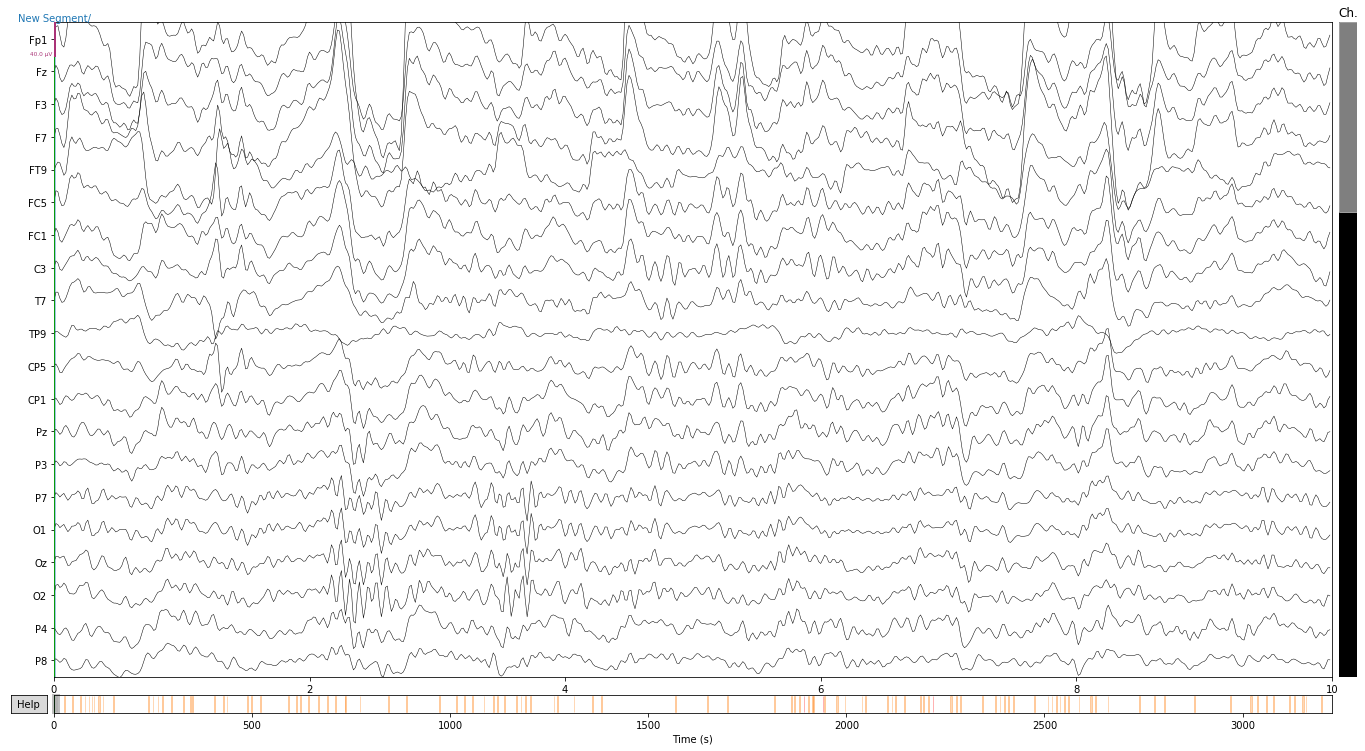

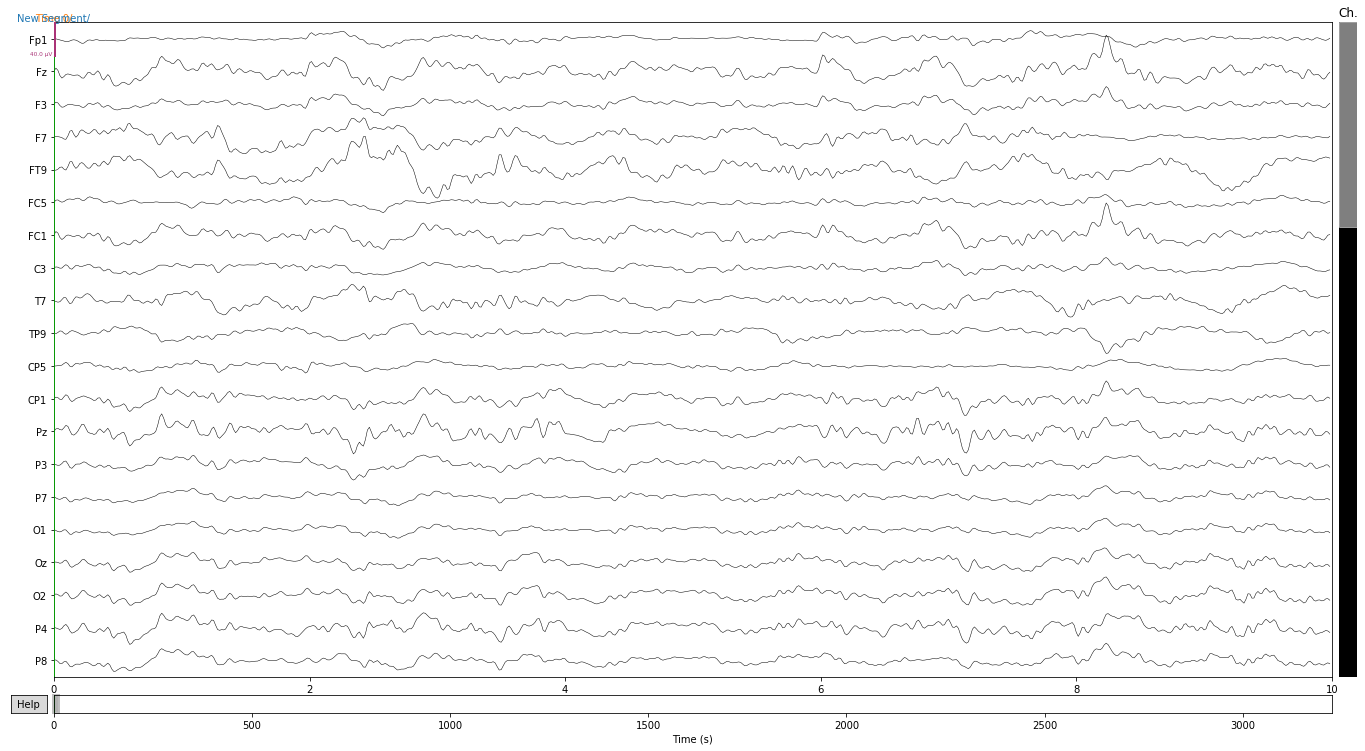

In [3]:
raw.plot();
cca.plot();

In [4]:
# get events/epochs
jaw_events = mne.events_from_annotations(raw)
tmin,tmax = -0.3,0.5
picks = mne.pick_types(raw.info,meg=False,eog=False,eeg=True)
raw_epochs = mne.Epochs(raw,jaw_events[0],tmin=tmin,tmax=tmax,baseline=(None,0))
cca_epochs = mne.Epochs(cca,jaw_events[0],tmin=tmin,tmax=tmax,baseline=(None,0))
raw_resp = raw_epochs.get_data(picks=picks)
cca_resp = cca_epochs.get_data(picks=picks)

Used Annotations descriptions: ['New Segment/', 'jaw']
110 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
110 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 110 events and 103 original time points ...
1 bad epochs dropped
Loading data for 110 events and 103 original time points ...
1 bad epochs dropped


Loading data for 109 events and 103 original time points ...
109 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


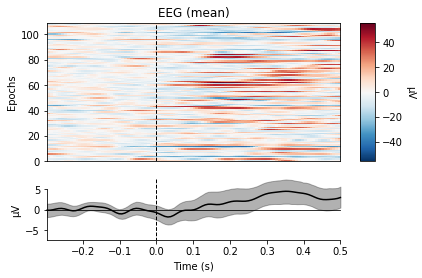

Loading data for 109 events and 103 original time points ...
109 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


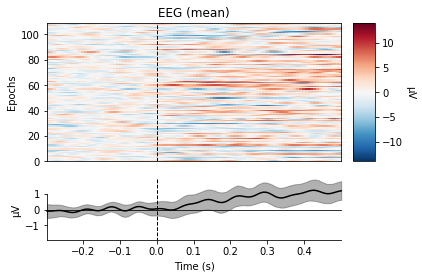

[<Figure size 432x288 with 3 Axes>]

In [5]:
raw_epochs.plot_image(combine='mean')
cca_epochs.plot_image(combine='mean')

In [6]:
raw_resp.shape

(109, 64, 103)

In [7]:
raw_ch_mean = np.hstack(raw_resp.mean(1))
cca_ch_mean = np.hstack(cca_resp.mean(1))
raw_rms = np.sqrt(np.hstack(raw_resp.mean(1)**2))
cca_rms = np.sqrt(np.hstack(cca_resp.mean(1)**2))

In [8]:
# resp
stat,pval = wilcoxon(raw_ch_mean,cca_ch_mean)
print(stat,pval)
reject,pval,alphacSidak,alphacBonf = multipletests(pval,alpha=0.05,method='fdr_by')
print(pval)

30337260.0 0.0006102502749586261
[0.00061025]


In [9]:
# RMS resp
stat,pval = wilcoxon(raw_rms,cca_rms)
print(stat,pval)
reject,pval,alphacSidak,alphacBonf = multipletests(pval,alpha=0.05,method='fdr_by')
print(pval)

3515287.0 0.0
[0.]


## Ks test

In [10]:
from scipy.stats import kstest

In [16]:
kstest(raw_rms,'norm')

KstestResult(statistic=0.5000000006115226, pvalue=0.0)

In [17]:
kstest(cca_rms,'norm')

KstestResult(statistic=0.50000000011384, pvalue=0.0)

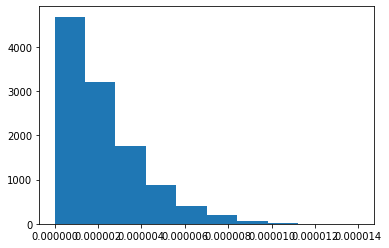

In [23]:
plt.hist(cca_rms);

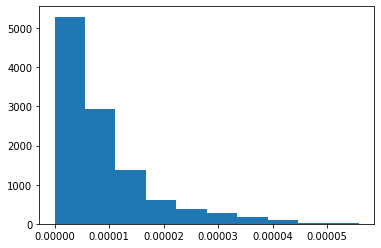

In [24]:
plt.hist(raw_rms);